In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

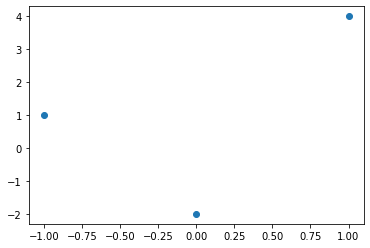

In [4]:
plt.scatter([-1,0,1], [1,-2,4])

In [5]:
data = {
    "x": np.random.randint(10, size=10000), 
    "y": np.cos(np.random.randint(10, size=10000))
}
df = pd.DataFrame(data, columns=['x', 'y'])

In [6]:
x = np.linspace(1, 10, 100)

In [7]:
y = pow(x + 50, 10) 

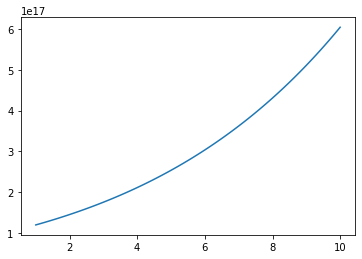

In [8]:
plt.plot(x,y)


In [9]:
def gradient_descent(learning_rate, iterations, X, Y):
    alpha, beta = 0, 0
    m = len(X)
    for it in range(0, iterations):
        alpha -= (2*learning_rate/m) * np.sum(alpha*X**2+beta*X-Y*X)
        beta -= (2*learning_rate/m) * np.sum(alpha*X+beta-Y)
    return alpha, beta

In [10]:
X = np.linspace(1,100,100)
Y = 3*X + 1

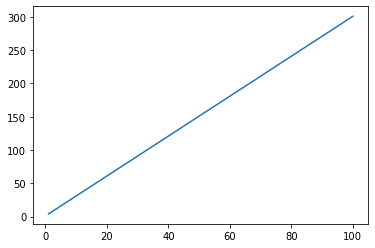

In [11]:
plt.plot(X, Y)

In [12]:
alpha, beta = gradient_descent(0.0001, 200000, X, Y)

In [13]:
alpha, beta

(3.000000775657924, 0.9999480347013958)

In [42]:
def gradient_descent_multivariable(learning_rate, iterations, X, y):
    '''
        discesa del gradiente multivariata. 
        
        Parametri:
            - learning_rate: l'ampiezza del passo ad ogni iterazione
            - iterations: il numero di iterazioni da fare
            - X: una matrice (m x n) contenente in ogni riga un'istanza (ad esempio di casa)
                 e su ogni colonna una feature (ad esempio numero di stanze, mq, ecc.)
            - y: un vettore riga contenente il valore ottenuto come y = theta * X 
                 (nel caso delle case, ad esempio, il costo della casa)
    '''
    m, n = X.shape #numero di case (m) per numero di feature da considerare (n)
    theta = np.zeros(n) #stabilisco il peso di ogni feature con questo vettore
    for it in range(iterations):
        error = X.dot(theta) - y
        theta -= (2*learning_rate / m) * X.T.dot(error)
    return theta
    

In [56]:
data = {
    'Bedrooms': [3, 2, 2, 1, 4],
    'Sq. feet': [2000, 800, 850, 550, 2000],
    'Normaltown': [1, 0, 1, 1, 0],
    'Hipsterton': [0, 1, 0, 0, 0],
    'Skid Row': [0, 0, 0, 0, 1],
    'Sale Price': [250000, 300000, 150000, 78000, 150000]
}
houses = pd.DataFrame(data, columns=['Bedrooms', 'Sq. feet', 'Normaltown', 'Hipsterton', 'Skid Row', 'Sale Price'])

In [16]:
houses

,Bedrooms,Sq. feet,Normaltown,Hipsterton,Skid Row,Sale Price
0,3,2000,1,0,0,250000
1,2,800,0,1,0,300000
2,2,850,1,0,0,150000
3,1,550,1,0,0,78000
4,4,2000,0,0,1,150000


In [17]:
houses.iloc[:, :-1]

,Bedrooms,Sq. feet,Normaltown,Hipsterton,Skid Row
0,3,2000,1,0,0
1,2,800,0,1,0
2,2,850,1,0,0
3,1,550,1,0,0
4,4,2000,0,0,1


In [57]:
houses.insert(0, "Termine Noto", [1,1,1,1,1], True)

In [19]:
houses.iloc[:, -1:]


,Sale Price
0,250000
1,300000
2,150000
3,78000
4,150000


In [20]:
houses

,Termine Noto,Bedrooms,Sq. feet,Normaltown,Hipsterton,Skid Row,Sale Price
0,1,3,2000,1,0,0,250000
1,1,2,800,0,1,0,300000
2,1,2,850,1,0,0,150000
3,1,1,550,1,0,0,78000
4,1,4,2000,0,0,1,150000


In [21]:
houses.iloc[:, -1:].shape, houses.iloc[:, :-1].T.shape

((5, 1), (6, 5))

In [ ]:
#costs = np.array([[250000], [300000], [150000], [78000], [150000]])
costs = np.array([250000, 300000, 150000, 78000, 150000])
houses = np.array([[1, 3, 2000, 1, 0, 0], [1, 2, 800, 0, 1, 0], [1, 2, 850, 1, 0, 0], [1, 1, 550, 1, 0, 0], [1, 4, 2000, 0, 0, 1]])

#theta=gradient_descent_multivariable(0.00001, 100, houses.iloc[:, :-1], houses.iloc[:, -1:])

theta=gradient_descent_multivariable(0.00001, 100, houses, costs)

In [54]:
theta

array([-3.11261283e+156, -8.96131108e+156, -4.85216026e+159,
       -1.70691642e+156, -4.01627950e+155, -1.00406846e+156])